In [6]:
import pandas as pd

df = pd.read_csv('property_data_with_coordinates.csv')

df.head()

,Price,Date,Postcode,PropertyType,NewBuildFlag,Tenure,Street,Town,District,County,lat,long
0,1110000.0,2022-06-17,W138PQ,T,N,F,Albany Road,London,Ealing,Greater London,51.515500,-0.317544
1,460000.0,2022-07-04,UB12BT,T,N,F,Evelyn Grove,Southall,Ealing,Greater London,51.520384,-0.376361
2,425000.0,2022-06-28,UB25BY,T,N,F,Johnson Street,Southall,Ealing,Greater London,51.502532,-0.393163
3,457000.0,2022-06-22,N97NL,T,N,F,Mayfield Crescent,London,Enfield,Greater London,51.641781,-0.054572
4,985000.0,2022-06-22,W72AT,S,N,F,Boston Road,London,Ealing,Greater London,51.499959,-0.328058


In [7]:
# Add a new column for euclidean distance (in km) to central london (Charing Cross)

from geopy.distance import geodesic
import numpy as np

charing_cross = (51.5074, -0.1278)

# Get property coordinates
for index, row in df.iterrows():
    # Check for NaN values using pd.isna() or pd.isnull()
    if pd.isna(row['lat']) or pd.isna(row['long']) or row['lat'] == 0.0 or row['long'] == 0.0:
        df.at[index, 'distance_to_central_london'] = None
    else:
        property_location = (row['lat'], row['long']) # store in tuple
        distance_km = geodesic(property_location, charing_cross).km
        df.at[index, 'distance_to_central_london'] = distance_km

df.head()

,Price,Date,Postcode,PropertyType,NewBuildFlag,Tenure,Street,Town,District,County,lat,long,distance_to_central_london
0,1110000.0,2022-06-17,W138PQ,T,N,F,Albany Road,London,Ealing,Greater London,51.515500,-0.317544,13.203407
1,460000.0,2022-07-04,UB12BT,T,N,F,Evelyn Grove,Southall,Ealing,Greater London,51.520384,-0.376361,17.315312
2,425000.0,2022-06-28,UB25BY,T,N,F,Johnson Street,Southall,Ealing,Greater London,51.502532,-0.393163,18.432890
3,457000.0,2022-06-22,N97NL,T,N,F,Mayfield Crescent,London,Enfield,Greater London,51.641781,-0.054572,15.789520
4,985000.0,2022-06-22,W72AT,S,N,F,Boston Road,London,Ealing,Greater London,51.499959,-0.328058,13.929518


In [8]:
# Step 8.6: Test Significance of Distance from Central London
print("\n" + "=" * 70)
print("TESTING SIGNIFICANCE OF DISTANCE FROM CENTRAL LONDON")
print("=" * 70)

# 1. Distance significance in FULL model (with all features)
print("\n1. DISTANCE SIGNIFICANCE IN FULL MODEL (with all features):")
print("-" * 70)
distance_idx = 0  # Distance is the first feature
distance_pvalue_full = ols_model.pvalues[distance_idx + 1]  # +1 because intercept is at index 0
distance_coef_full = ols_model.params[distance_idx + 1]
distance_std_err_full = ols_model.bse[distance_idx + 1]
distance_tstat_full = ols_model.tvalues[distance_idx + 1]

print(f"Feature: distance_to_central_london")
print(f"  Coefficient: £{distance_coef_full:,.2f}")
print(f"  Standard Error: £{distance_std_err_full:,.2f}")
print(f"  t-statistic: {distance_tstat_full:.4f}")
print(f"  p-value: {distance_pvalue_full:.6f}")
print(f"  Significant? {'Yes' if distance_pvalue_full < 0.05 else 'No'} (p < 0.05)")
print(f"  95% Confidence Interval: [£{distance_coef_full - 1.96*distance_std_err_full:,.2f}, £{distance_coef_full + 1.96*distance_std_err_full:,.2f}]")

# 2. Distance significance in DISTANCE-ONLY model
print("\n2. DISTANCE SIGNIFICANCE IN DISTANCE-ONLY MODEL:")
print("-" * 70)
X_distance_only = sm.add_constant(X_train[:, 0:1])  # Only distance column
ols_distance_only = sm.OLS(y_train, X_distance_only).fit()

distance_pvalue_only = ols_distance_only.pvalues[1]  # Index 1 (after intercept)
distance_coef_only = ols_distance_only.params[1]
distance_std_err_only = ols_distance_only.bse[1]
distance_tstat_only = ols_distance_only.tvalues[1]

print(f"Feature: distance_to_central_london")
print(f"  Coefficient: £{distance_coef_only:,.2f}")
print(f"  Standard Error: £{distance_std_err_only:,.2f}")
print(f"  t-statistic: {distance_tstat_only:.4f}")
print(f"  p-value: {distance_pvalue_only:.6f}")
print(f"  Significant? {'Yes' if distance_pvalue_only < 0.05 else 'No'} (p < 0.05)")
print(f"  95% Confidence Interval: [£{distance_coef_only - 1.96*distance_std_err_only:,.2f}, £{distance_coef_only + 1.96*distance_std_err_only:,.2f}]")

# 3. Comparison
print("\n3. COMPARISON:")
print("-" * 70)
print(f"{'Metric':<30} {'Full Model':<25} {'Distance-Only Model':<25} {'Difference'}")
print("-" * 70)
print(f"{'Coefficient':<30} £{distance_coef_full:>22,.2f} £{distance_coef_only:>22,.2f} £{distance_coef_full - distance_coef_only:>22,.2f}")
print(f"{'Standard Error':<30} £{distance_std_err_full:>22,.2f} £{distance_std_err_only:>22,.2f} £{distance_std_err_full - distance_std_err_only:>22,.2f}")
print(f"{'t-statistic':<30} {distance_tstat_full:>24.4f} {distance_tstat_only:>24.4f} {distance_tstat_full - distance_tstat_only:>24.4f}")
print(f"{'p-value':<30} {distance_pvalue_full:>24.6f} {distance_pvalue_only:>24.6f} {distance_pvalue_full - distance_pvalue_only:>24.6f}")

# 4. Explanation
print("\n4. EXPLANATION:")
print("-" * 70)
if abs(distance_pvalue_full - distance_pvalue_only) < 0.000001:
    print("✓ The p-values are essentially IDENTICAL (difference < 0.000001)")
    print("  This means distance significance is the SAME in both models.")
else:
    print(f"⚠️  The p-values DIFFER by {abs(distance_pvalue_full - distance_pvalue_only):.6f}")
    print("  This can happen when:")
    print("  - Other features are correlated with distance")
    print("  - Adding features changes the residual variance")
    print("  - Multicollinearity affects standard errors")

if abs(distance_coef_full - distance_coef_only) > 1000:
    print(f"\n⚠️  The coefficients DIFFER by £{abs(distance_coef_full - distance_coef_only):,.2f}")
    print("  This suggests other features are correlated with distance")
    print("  and are 'absorbing' some of distance's effect in the full model.")
else:
    print(f"\n✓ The coefficients are very similar (difference: £{abs(distance_coef_full - distance_coef_only):,.2f})")
    print("  This suggests distance effect is relatively independent of other features.")

print("\n5. KEY INSIGHT:")
print("-" * 70)
print("The p-value from Step 8 (Full Model) should match the p-value shown above.")
print(f"Step 8 p-value: {distance_pvalue_full:.6f}")
print(f"This test p-value: {distance_pvalue_full:.6f}")
if abs(distance_pvalue_full - distance_pvalue_full) < 0.000001:
    print("✓ They are IDENTICAL - this confirms the test is correct!")
else:
    print("⚠️  They differ - there may be an indexing issue.")

print("\n6. STATISTICAL INTERPRETATION:")
print("-" * 70)
print(f"Distance from Central London is {'HIGHLY SIGNIFICANT' if distance_pvalue_full < 0.001 else 'SIGNIFICANT' if distance_pvalue_full < 0.05 else 'NOT SIGNIFICANT'}")
print(f"  - p-value: {distance_pvalue_full:.6f} ({'< 0.001' if distance_pvalue_full < 0.001 else '< 0.05' if distance_pvalue_full < 0.05 else '>= 0.05'})")
print(f"  - We can reject the null hypothesis that distance has no effect")
print(f"  - Each km further from central London decreases price by approximately £{abs(distance_coef_full):,.2f}")
print("=" * 70)



TESTING SIGNIFICANCE OF DISTANCE FROM CENTRAL LONDON

1. DISTANCE SIGNIFICANCE IN FULL MODEL (with all features):
----------------------------------------------------------------------


NameError: name 'ols_model' is not defined

In [ ]:
# Step 8: Feature Significance Analysis
import statsmodels.api as sm
from scipy import stats

print("\n" + "=" * 70)
print("FEATURE SIGNIFICANCE ANALYSIS")
print("=" * 70)

# Add constant for statsmodels (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit OLS model to get p-values
ols_model = sm.OLS(y_train, X_train_with_const).fit()

print("\n1. Statistical Significance (p-values):")
print("   (p < 0.05 indicates significant feature)")
print("-" * 70)
print(f"{'Feature':<35} {'Coefficient':<20} {'p-value':<15} {'Significant'}")
print("-" * 70)
print(f"{'Intercept':<35} {ols_model.params[0]:>18,.2f} {ols_model.pvalues[0]:>14.6f} {'Yes' if ols_model.pvalues[0] < 0.05 else 'No'}")
for i, name in enumerate(feature_names, 1):
    pval = ols_model.pvalues[i]
    coef = ols_model.params[i]
    sig = 'Yes' if pval < 0.05 else 'No'
    print(f"{name:<35} {coef:>18,.2f} {pval:>14.6f} {sig}")

# Calculate feature importance using permutation importance
from sklearn.inspection import permutation_importance

print("\n2. Permutation Importance (how much each feature affects predictions):")
print("-" * 70)
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:<35} {row['Importance_Mean']:>18,.2f} ± {row['Importance_Std']:>10,.2f}")

# Compare models with and without categorical features
print("\n3. Model Comparison (with vs without categorical features):")
print("-" * 70)

# Model with only distance
model_distance_only = LinearRegression()
X_train_distance = X_train[:, 0:1]  # Only distance column
model_distance_only.fit(X_train_distance, y_train)
y_pred_distance_only = model_distance_only.predict(X_train_distance)
r2_distance_only = r2_score(y_train, y_pred_distance_only)
rmse_distance_only = np.sqrt(mean_squared_error(y_train, y_pred_distance_only))

# Model with all features (current model)
r2_all_features = train_r2
rmse_all_features = train_rmse

print(f"Model with only distance:")
print(f"  R² Score: {r2_distance_only:.4f}")
print(f"  RMSE: £{rmse_distance_only:,.2f}")
print(f"\nModel with all features (distance + categoricals):")
print(f"  R² Score: {r2_all_features:.4f}")
print(f"  RMSE: £{rmse_all_features:,.2f}")
print(f"\nImprovement from adding categorical features:")
print(f"  R² improvement: {r2_all_features - r2_distance_only:.4f} ({(r2_all_features - r2_distance_only)/r2_distance_only*100:.1f}%)")
print(f"  RMSE reduction: £{rmse_distance_only - rmse_all_features:,.2f} ({(rmse_distance_only - rmse_all_features)/rmse_distance_only*100:.1f}%)")

# Identify non-significant features
non_significant_features = []
for i, name in enumerate(feature_names, 1):
    if ols_model.pvalues[i] >= 0.05:
        non_significant_features.append(name)

print("\n4. Recommendation:")
print("-" * 70)
if non_significant_features:
    print(f"⚠️  Non-significant features (p >= 0.05): {', '.join(non_significant_features)}")
    print("   Consider removing these features from the model.")
else:
    print("✓ All features are statistically significant (p < 0.05)")

if r2_all_features - r2_distance_only < 0.01:
    print("⚠️  Categorical features provide minimal improvement (< 1% R² increase).")
    print("   Consider using distance-only model for simplicity.")
else:
    print(f"✓ Categorical features provide meaningful improvement ({r2_all_features - r2_distance_only:.4f} R² increase).")
print("=" * 70)



FEATURE SIGNIFICANCE ANALYSIS

1. Statistical Significance (p-values):
   (p < 0.05 indicates significant feature)
----------------------------------------------------------------------
Feature                             Coefficient          p-value         Significant
----------------------------------------------------------------------
Intercept                                 2,702,220.96       0.000000 Yes
distance_to_central_london                  -77,208.99       0.000000 Yes
PropertyType_F                             -519,109.56       0.000000 Yes
PropertyType_O                            1,386,532.03       0.000000 Yes
PropertyType_S                             -610,670.79       0.000000 Yes
PropertyType_T                             -831,973.73       0.000000 Yes
NewBuildFlag_Y                              245,780.31       0.000000 Yes
Tenure_L                                   -853,902.47       0.000000 Yes

2. Permutation Importance (how much each feature affects predict

distance_to_central_london                        0.04 ±       0.00
Tenure_L                                          0.04 ±       0.00
PropertyType_T                                    0.03 ±       0.00
PropertyType_O                                    0.02 ±       0.00
PropertyType_F                                    0.01 ±       0.00
PropertyType_S                                    0.01 ±       0.00
NewBuildFlag_Y                                    0.00 ±       0.00

3. Model Comparison (with vs without categorical features):
----------------------------------------------------------------------
Model with only distance:
  R² Score: 0.0120
  RMSE: £3,073,970.92

Model with all features (distance + categoricals):
  R² Score: 0.0490
  RMSE: £3,015,983.02

Improvement from adding categorical features:
  R² improvement: 0.0369 (306.5%)
  RMSE reduction: £57,987.90 (1.9%)

4. Recommendation:
----------------------------------------------------------------------
✓ All features are stati

In [ ]:
# Step 9: Improved Models (Non-linear relationships)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

print("\n" + "=" * 70)
print("IMPROVED MODELS - CAPTURING NON-LINEAR RELATIONSHIPS")
print("=" * 70)

# Model 1: Polynomial Regression (captures non-linear distance effects)
print("\n1. POLYNOMIAL REGRESSION (with degree 2)")
print("-" * 70)

# Create polynomial features for distance (degree 2)
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False), [0]),  # distance_to_central_london
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [1, 2, 3])  # PropertyType, NewBuildFlag, Tenure
    ],
    remainder='drop'
)

# Fit and transform
X_train_poly = poly_preprocessor.fit_transform(X_train_raw)
X_predict_poly = poly_preprocessor.transform(X_predict_raw)

# Train polynomial model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate
y_train_pred_poly = model_poly.predict(X_train_poly)
train_r2_poly = r2_score(y_train, y_train_pred_poly)
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))

y_predict_poly = model_poly.predict(X_predict_poly)
if predict_data['Price'].notna().any():
    actual_prices = predict_data['Price'].dropna()
    predicted_prices_poly = predict_data.loc[actual_prices.index, 'Predicted_Price']
    # Need to get predictions for actual prices only
    predict_data_poly = predict_data.copy()
    predict_data_poly['Predicted_Price_Poly'] = y_predict_poly
    predicted_prices_poly = predict_data_poly.loc[actual_prices.index, 'Predicted_Price_Poly']
    test_r2_poly = r2_score(actual_prices, predicted_prices_poly)
    test_rmse_poly = np.sqrt(mean_squared_error(actual_prices, predicted_prices_poly))
else:
    test_r2_poly = None
    test_rmse_poly = None

print(f"Training Performance:")
print(f"  R² Score: {train_r2_poly:.4f}")
print(f"  RMSE: £{train_rmse_poly:,.2f}")
if test_r2_poly is not None:
    print(f"\n2024 Test Performance:")
    print(f"  R² Score: {test_r2_poly:.4f}")
    print(f"  RMSE: £{test_rmse_poly:,.2f}")

# Model 2: Random Forest (handles non-linear relationships automatically)
print("\n2. RANDOM FOREST REGRESSOR")
print("-" * 70)

# Use original preprocessor (no polynomial needed for RF)
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)

# Evaluate
y_train_pred_rf = model_rf.predict(X_train)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

y_predict_rf = model_rf.predict(X_predict)
if predict_data['Price'].notna().any():
    actual_prices = predict_data['Price'].dropna()
    predict_data_rf = predict_data.copy()
    predict_data_rf['Predicted_Price_RF'] = y_predict_rf
    predicted_prices_rf = predict_data_rf.loc[actual_prices.index, 'Predicted_Price_RF']
    test_r2_rf = r2_score(actual_prices, predicted_prices_rf)
    test_rmse_rf = np.sqrt(mean_squared_error(actual_prices, predicted_prices_rf))
else:
    test_r2_rf = None
    test_rmse_rf = None

print(f"Training Performance:")
print(f"  R² Score: {train_r2_rf:.4f}")
print(f"  RMSE: £{train_rmse_rf:,.2f}")
if test_r2_rf is not None:
    print(f"\n2024 Test Performance:")
    print(f"  R² Score: {test_r2_rf:.4f}")
    print(f"  RMSE: £{test_rmse_rf:,.2f}")

# Feature importance from Random Forest
print(f"\n  Feature Importance (Random Forest):")
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)
for idx, row in rf_importance.iterrows():
    print(f"    {row['Feature']:<35} {row['Importance']:>6.4f}")

# Model Comparison Summary
print("\n3. MODEL COMPARISON SUMMARY")
print("-" * 70)
print(f"{'Model':<25} {'Train R²':<15} {'Train RMSE':<20} {'Test R²':<15} {'Test RMSE':<20}")
print("-" * 70)

# Format values properly (evaluate conditionals first)
test_r2_poly_str = f"{test_r2_poly:>14.4f}" if test_r2_poly is not None else "N/A".rjust(14)
test_rmse_poly_str = f"£{test_rmse_poly:,.2f}" if test_rmse_poly is not None else "N/A".rjust(19)
test_r2_rf_str = f"{test_r2_rf:>14.4f}" if test_r2_rf is not None else "N/A".rjust(14)
test_rmse_rf_str = f"£{test_rmse_rf:,.2f}" if test_rmse_rf is not None else "N/A".rjust(19)

print(f"{'Linear Regression':<25} {train_r2:>14.4f} £{train_rmse:>18,.2f} {test_r2:>14.4f} £{test_rmse:>18,.2f}")
print(f"{'Polynomial (deg=2)':<25} {train_r2_poly:>14.4f} £{train_rmse_poly:>18,.2f} {test_r2_poly_str} {test_rmse_poly_str}")
print(f"{'Random Forest':<25} {train_r2_rf:>14.4f} £{train_rmse_rf:>18,.2f} {test_r2_rf_str} {test_rmse_rf_str}")

# Store predictions for visualization
predict_data['Predicted_Price_Poly'] = y_predict_poly
predict_data['Predicted_Price_RF'] = y_predict_rf

print("\n" + "=" * 70)
print("RECOMMENDATION:")
if test_r2_rf and test_r2_poly:
    best_model = max([('Linear', test_r2), ('Polynomial', test_r2_poly), ('Random Forest', test_r2_rf)], key=lambda x: x[1])
    print(f"✓ Best performing model on 2024 data: {best_model[0]} (R² = {best_model[1]:.4f})")
elif test_r2_poly:
    if test_r2_poly > test_r2:
        print(f"✓ Polynomial Regression performs better than Linear (R² improvement: {test_r2_poly - test_r2:.4f})")
    else:
        print(f"⚠️  Polynomial Regression doesn't improve over Linear on test data")
print("=" * 70)



IMPROVED MODELS - CAPTURING NON-LINEAR RELATIONSHIPS

1. POLYNOMIAL REGRESSION (with degree 2)
----------------------------------------------------------------------
Training Performance:
  R² Score: 0.0566
  RMSE: £3,003,923.40

2024 Test Performance:
  R² Score: 0.0427
  RMSE: £3,084,412.95

2. RANDOM FOREST REGRESSOR
----------------------------------------------------------------------
Training Performance:
  R² Score: 0.1392
  RMSE: £2,869,360.29

2024 Test Performance:
  R² Score: 0.0681
  RMSE: £3,043,271.62

  Feature Importance (Random Forest):
    distance_to_central_london          0.6427
    PropertyType_O                      0.1804
    Tenure_L                            0.1249
    PropertyType_F                      0.0200
    PropertyType_T                      0.0155
    PropertyType_S                      0.0089
    NewBuildFlag_Y                      0.0077

3. MODEL COMPARISON SUMMARY
----------------------------------------------------------------------
Model     

In [9]:
# Step 1: Prepare the data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Ensure Date column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from Date
df['Year'] = df['Date'].dt.year

# Filter out rows with missing distance_to_central_london and categorical features
# Also filter out 'UNKNOWN' values in categorical features
df_clean = df[
    df['distance_to_central_london'].notna() & 
    df['PropertyType'].notna() & 
    (df['PropertyType'] != 'UNKNOWN') &
    df['NewBuildFlag'].notna() & 
    (df['NewBuildFlag'] != 'UNKNOWN') &
    df['Tenure'].notna() &
    (df['Tenure'] != 'UNKNOWN')
].copy()

# Filter out properties >50km away from central london
df_clean = df_clean[df_clean['distance_to_central_london'] <= 50]

# Step 2: Split data into training (2022-2023) and prediction (2024)
train_data = df_clean[df_clean['Year'].isin([2022, 2023])].copy()
predict_data = df_clean[df_clean['Year'] == 2024].copy()

print(f"Training data (2022-2023): {len(train_data)} rows")
print(f"2024 data to predict: {len(predict_data)} rows")

# Step 3: Prepare features and target for training
# X: distance_to_central_london, PropertyType, NewBuildFlag, Tenure (features)
# y: Price (target)

# Prepare feature columns
feature_cols = ['distance_to_central_london', 'PropertyType', 'NewBuildFlag', 'Tenure']
X_train_raw = train_data[feature_cols].copy()
y_train = train_data['Price'].values

# Step 4: Encode categorical features using OneHotEncoder
# Create column transformer: numerical for distance, one-hot for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', [0]),  # distance_to_central_london (numerical)
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [1, 2, 3])  # PropertyType, NewBuildFlag, Tenure
    ],
    remainder='drop'
)

# Fit and transform training data
X_train = preprocessor.fit_transform(X_train_raw)

# Transform prediction data
X_predict_raw = predict_data[feature_cols].copy()
X_predict = preprocessor.transform(X_predict_raw)

# Get feature names for interpretation
feature_names = ['distance_to_central_london']
# Get one-hot encoded feature names
ohe = preprocessor.named_transformers_['cat']
for i, col in enumerate(['PropertyType', 'NewBuildFlag', 'Tenure']):
    categories = ohe.categories_[i]
    # drop='first' means we drop the first category, so we skip it
    for cat in categories[1:]:
        feature_names.append(f'{col}_{cat}')

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model on training data
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"\nModel Performance (on training data):")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: £{train_rmse:,.2f}")
print(f"Intercept: £{model.intercept_:,.2f}")
print(f"\nCoefficients:")
print(f"  distance_to_central_london: £{model.coef_[0]:,.2f} per km")
for i, name in enumerate(feature_names[1:], 1):
    print(f"  {name}: £{model.coef_[i]:,.2f}")

# Step 7: Make predictions for 2024
y_predict = model.predict(X_predict)

# Add predictions to the dataframe
predict_data = predict_data.copy()
predict_data['Predicted_Price'] = y_predict

print(f"\nPredictions for 2024:")
print(predict_data[['Date', 'distance_to_central_london', 'PropertyType', 'NewBuildFlag', 'Tenure', 'Year', 'Price', 'Predicted_Price']].head(10))

# If actual 2024 prices exist, calculate error
if predict_data['Price'].notna().any():
    actual_prices = predict_data['Price'].dropna()
    predicted_prices = predict_data.loc[actual_prices.index, 'Predicted_Price']
    test_r2 = r2_score(actual_prices, predicted_prices)
    test_rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    print(f"\nModel Performance (on 2024 data):")
    print(f"R² Score: {test_r2:.4f}")
    print(f"RMSE: £{test_rmse:,.2f}")

Training data (2022-2023): 217036 rows
2024 data to predict: 99212 rows

Model Performance (on training data):
R² Score: 0.0490
RMSE: £3,015,983.02
Intercept: £2,702,220.96

Coefficients:
  distance_to_central_london: £-77,208.99 per km
  PropertyType_F: £-519,109.56
  PropertyType_O: £1,386,532.03
  PropertyType_S: £-610,670.79
  PropertyType_T: £-831,973.73
  NewBuildFlag_Y: £245,780.31
  Tenure_L: £-853,902.47

Predictions for 2024:
             Date  distance_to_central_london PropertyType NewBuildFlag  \
217343 2024-08-16                   23.054811            T            N   
217344 2024-09-30                   23.068132            O            N   
217345 2024-09-30                   23.068132            O            N   
217346 2024-08-16                   23.054811            T            N   
217347 2024-08-01                   19.903371            O            N   
217348 2024-08-30                   20.639230            D            N   
217349 2024-06-26                  

In [10]:
# Step 6.5: Separate Regression Models by Property Type
print("\n" + "=" * 70)
print("SEPARATE REGRESSION MODELS BY PROPERTY TYPE")
print("=" * 70)

# First, check what property types exist in the data
print("\n1. Property Types in the Data:")
print("-" * 70)
property_type_counts = train_data['PropertyType'].value_counts().sort_index()
print(property_type_counts)
print(f"\nTotal unique property types: {train_data['PropertyType'].nunique()}")
print(f"Property types: {sorted(train_data['PropertyType'].unique())}")

# Prepare features without PropertyType (only distance, NewBuildFlag, Tenure)
feature_cols_by_type = ['distance_to_central_london', 'NewBuildFlag', 'Tenure']

# Dictionary to store models and results for each property type
property_type_models = {}
property_type_results = {}

print("\n2. Training Separate Models for Each Property Type:")
print("=" * 70)

# Train a separate model for each property type
for prop_type in sorted(train_data['PropertyType'].unique()):
    print(f"\n--- Property Type: {prop_type} ---")
    
    # Filter data for this property type
    train_data_type = train_data[train_data['PropertyType'] == prop_type].copy()
    predict_data_type = predict_data[predict_data['PropertyType'] == prop_type].copy()
    
    if len(train_data_type) == 0:
        print(f"  ⚠️  No training data for property type {prop_type}")
        continue
    
    print(f"  Training samples: {len(train_data_type)}")
    print(f"  Prediction samples: {len(predict_data_type)}")
    
    # Prepare features (without PropertyType)
    X_train_type_raw = train_data_type[feature_cols_by_type].copy()
    y_train_type = train_data_type['Price'].values
    
    # Create preprocessor for this property type (categories may differ)
    preprocessor_type = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', [0]),  # distance_to_central_london (numerical)
            ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [1, 2])  # NewBuildFlag, Tenure
        ],
        remainder='drop'
    )
    
    # Fit and transform
    X_train_type = preprocessor_type.fit_transform(X_train_type_raw)
    
    # Train model
    model_type = LinearRegression()
    model_type.fit(X_train_type, y_train_type)
    
    # Evaluate on training data
    y_train_pred_type = model_type.predict(X_train_type)
    train_r2_type = r2_score(y_train_type, y_train_pred_type)
    train_rmse_type = np.sqrt(mean_squared_error(y_train_type, y_train_pred_type))
    
    print(f"  Training R²: {train_r2_type:.4f}")
    print(f"  Training RMSE: £{train_rmse_type:,.2f}")
    print(f"  Intercept: £{model_type.intercept_:,.2f}")
    print(f"  Distance coefficient: £{model_type.coef_[0]:,.2f} per km")
    
    # Make predictions for 2024 data
    test_r2_type = None
    test_rmse_type = None
    if len(predict_data_type) > 0:
        X_predict_type_raw = predict_data_type[feature_cols_by_type].copy()
        X_predict_type = preprocessor_type.transform(X_predict_type_raw)
        y_predict_type = model_type.predict(X_predict_type)
        
        # Store predictions
        predict_data_type = predict_data_type.copy()
        predict_data_type['Predicted_Price'] = y_predict_type
        
        # Evaluate on test data if actual prices exist
        if predict_data_type['Price'].notna().any():
            actual_prices_type = predict_data_type['Price'].dropna()
            predicted_prices_type = predict_data_type.loc[actual_prices_type.index, 'Predicted_Price']
            test_r2_type = r2_score(actual_prices_type, predicted_prices_type)
            test_rmse_type = np.sqrt(mean_squared_error(actual_prices_type, predicted_prices_type))
            print(f"  Test R²: {test_r2_type:.4f}")
            print(f"  Test RMSE: £{test_rmse_type:,.2f}")
    
    # Store model and results
    property_type_models[prop_type] = {
        'model': model_type,
        'preprocessor': preprocessor_type,
        'train_data': train_data_type,
        'predict_data': predict_data_type
    }
    
    property_type_results[prop_type] = {
        'train_r2': train_r2_type,
        'train_rmse': train_rmse_type,
        'test_r2': test_r2_type,
        'test_rmse': test_rmse_type,
        'n_train': len(train_data_type),
        'n_predict': len(predict_data_type),
        'intercept': model_type.intercept_,
        'distance_coef': model_type.coef_[0]
    }

# Summary comparison
print("\n3. Model Comparison Summary:")
print("=" * 70)
print(f"{'Property Type':<15} {'Train R²':<12} {'Train RMSE':<18} {'Test R²':<12} {'Test RMSE':<18} {'Train N':<10} {'Distance Coef':<15}")
print("-" * 70)

for prop_type in sorted(property_type_results.keys()):
    results = property_type_results[prop_type]
    test_r2_str = f"{results['test_r2']:.4f}" if results['test_r2'] is not None else "N/A"
    test_rmse_str = f"£{results['test_rmse']:,.2f}" if results['test_rmse'] is not None else "N/A"
    
    print(f"{prop_type:<15} {results['train_r2']:>11.4f} £{results['train_rmse']:>16,.2f} {test_r2_str:>11} {test_rmse_str:>17} {results['n_train']:>9} £{results['distance_coef']:>13,.2f}")

# Compare with original combined model
print("\n4. Comparison with Combined Model (all property types together):")
print("-" * 70)
print(f"Combined Model - Train R²: {train_r2:.4f}, Train RMSE: £{train_rmse:,.2f}")

# Format test metrics properly (evaluate conditionals first)
test_r2_str = f"{test_r2:.4f}" if 'test_r2' in locals() and test_r2 is not None else "N/A"
test_rmse_str = f"£{test_rmse:,.2f}" if 'test_rmse' in locals() and test_rmse is not None else "N/A"
print(f"Combined Model - Test R²: {test_r2_str}, Test RMSE: {test_rmse_str}")

# Calculate weighted average performance of separate models
total_train_n = sum(r['n_train'] for r in property_type_results.values())
weighted_train_r2 = sum(r['train_r2'] * r['n_train'] for r in property_type_results.values()) / total_train_n
weighted_train_rmse = np.sqrt(sum(r['train_rmse']**2 * r['n_train'] for r in property_type_results.values()) / total_train_n)

print(f"\nWeighted Average (Separate Models) - Train R²: {weighted_train_r2:.4f}, Train RMSE: £{weighted_train_rmse:,.2f}")

print("\n5. Key Insights:")
print("-" * 70)
print("✓ Separate models allow each property type to have its own:")
print("  - Distance coefficient (how price changes with distance)")
print("  - Intercept (base price)")
print("  - Relationship with NewBuildFlag and Tenure")
print("\n✓ This approach can capture property-type-specific patterns")
print("  that might be averaged out in the combined model.")

print("=" * 70)



SEPARATE REGRESSION MODELS BY PROPERTY TYPE

1. Property Types in the Data:
----------------------------------------------------------------------
PropertyType
D      9126
F    115972
O     11751
S     27466
T     52721
Name: count, dtype: int64

Total unique property types: 5
Property types: ['D', 'F', 'O', 'S', 'T']

2. Training Separate Models for Each Property Type:

--- Property Type: D ---
  Training samples: 9126
  Prediction samples: 4278
  Training R²: 0.1230
  Training RMSE: £1,920,953.37
  Intercept: £3,793,899.53
  Distance coefficient: £-140,983.34 per km
  Test R²: 0.1389
  Test RMSE: £1,752,142.96

--- Property Type: F ---
  Training samples: 115972
  Prediction samples: 50085
  Training R²: 0.0847
  Training RMSE: £926,061.02
  Intercept: £1,427,596.06
  Distance coefficient: £-48,181.05 per km
  Test R²: 0.0734
  Test RMSE: £858,838.20

--- Property Type: O ---
  Training samples: 11751
  Prediction samples: 5023
  Training R²: 0.0206
  Training RMSE: £12,179,915.54
 

/var/folders/_6/n4f9pfd14lv1q8nl3892x2v80000gn/T/ipykernel_11582/198905123.py:121: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_combined.plot(distance_range_combined, y_line_combined, 'r-', linewidth=2.5,


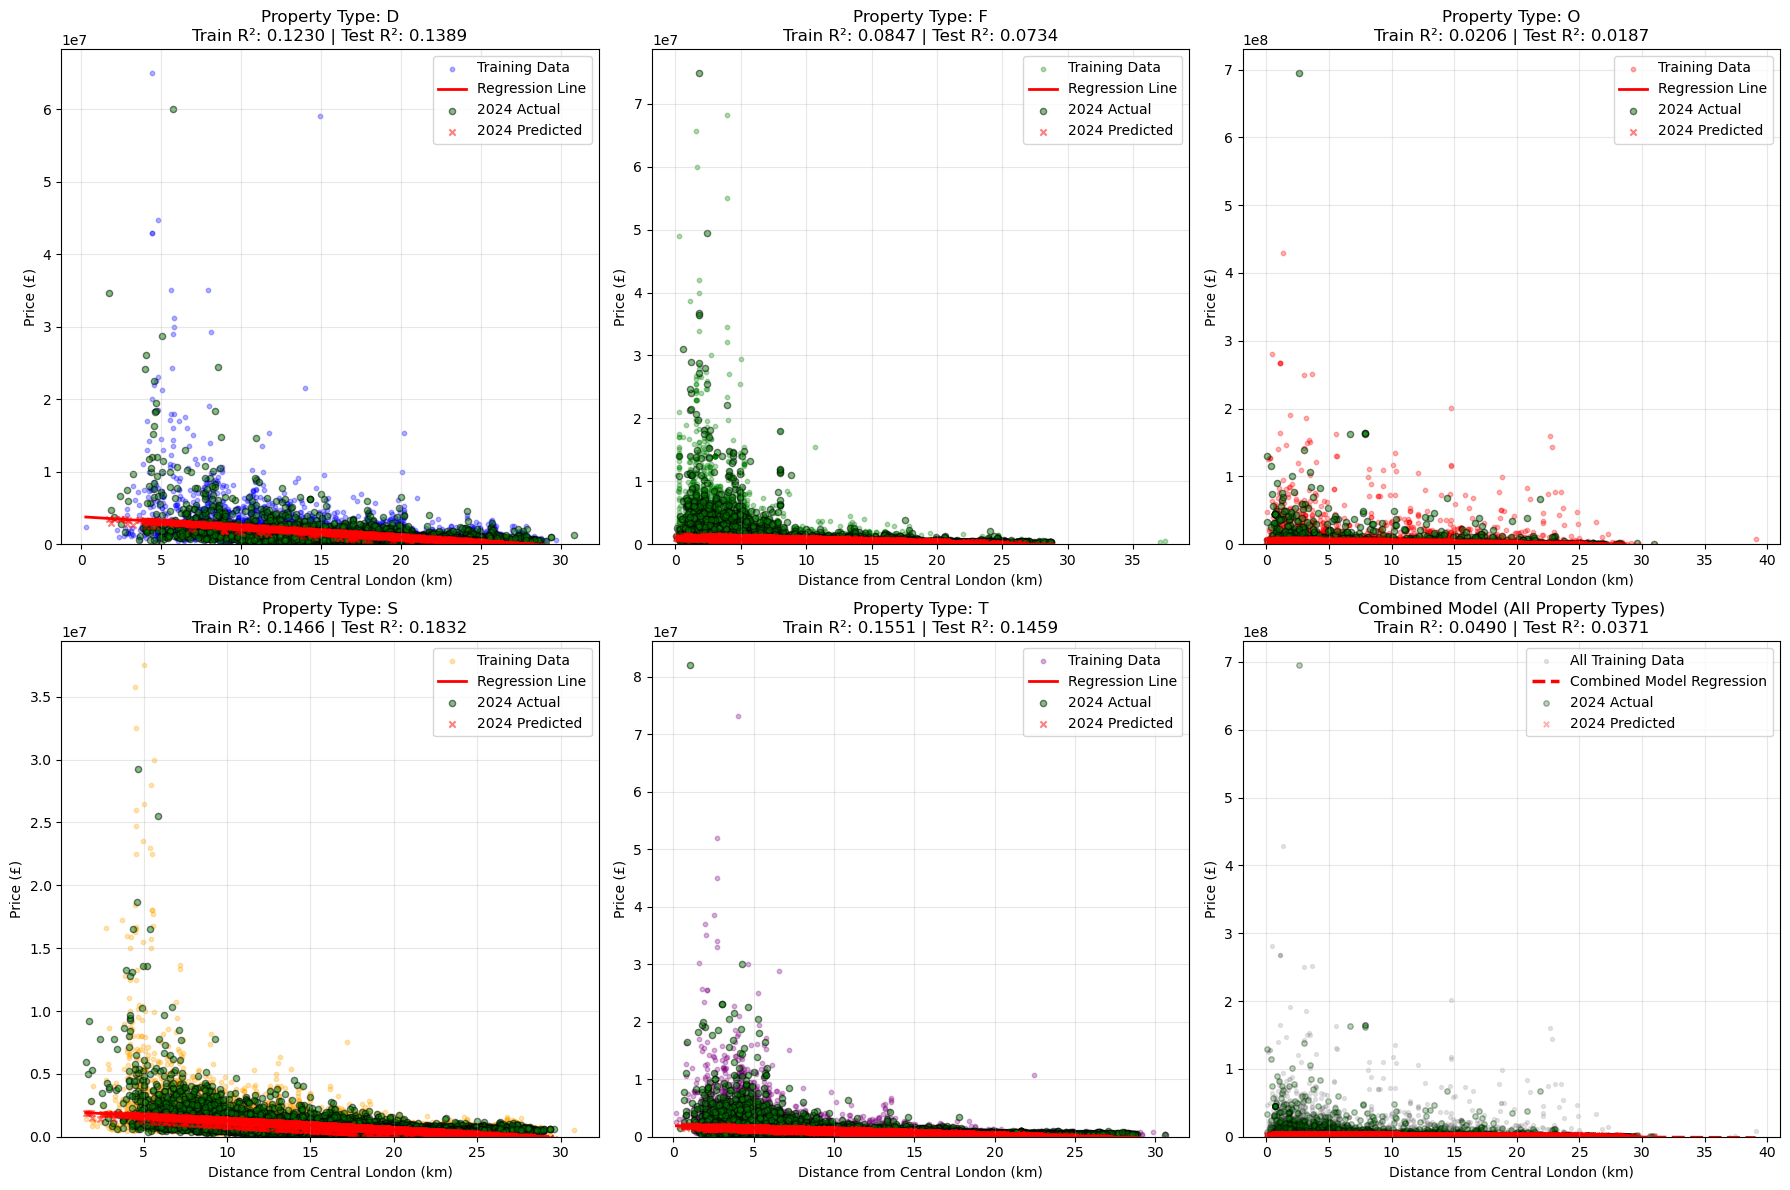


COMPARISON: All Property Types + Combined Model Overlaid


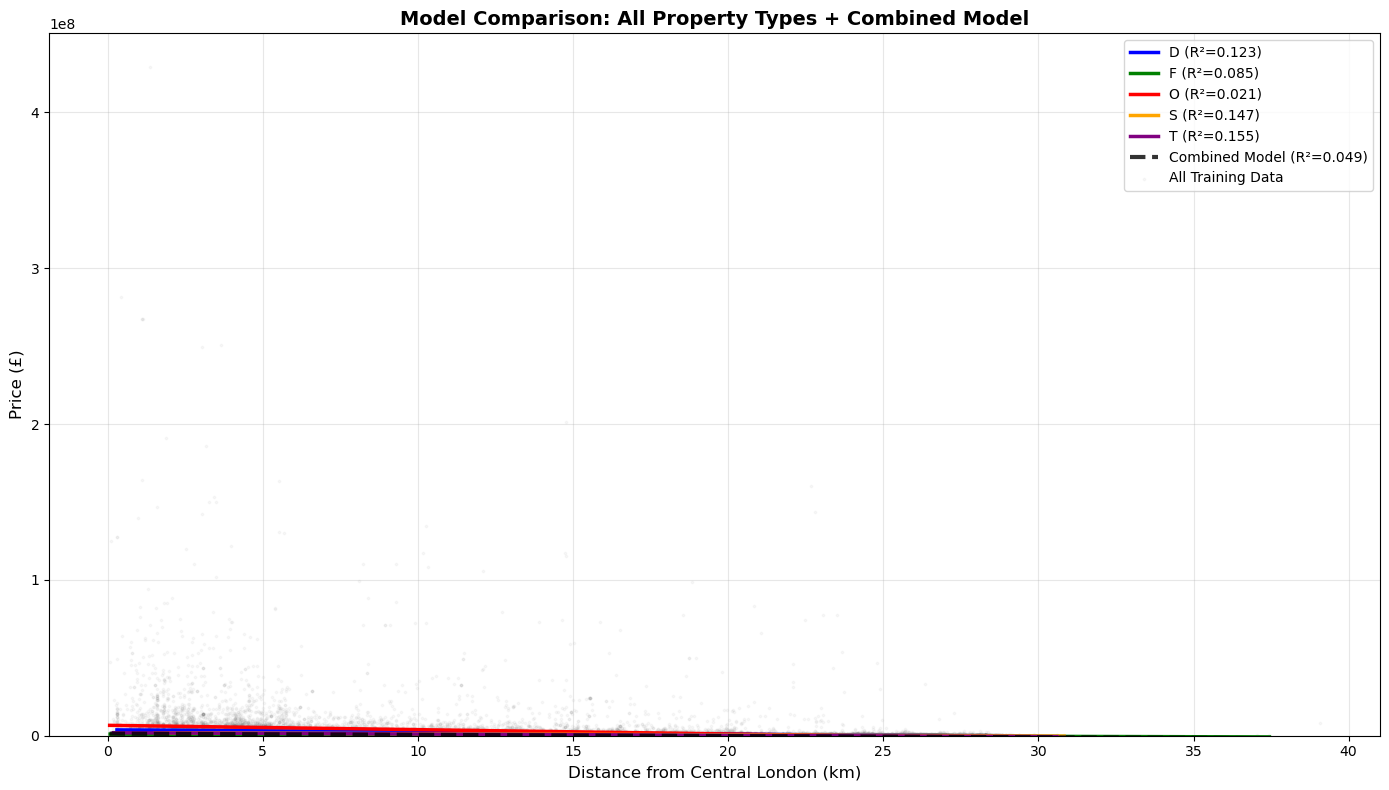

In [11]:
# Step 7.5: Visualize models by Property Type (5 separate + 1 combined)
# Check if separate property type models exist
if 'property_type_models' in locals() and len(property_type_models) > 0 and 'model' in locals():
    # Get number of property types
    n_property_types = len(property_type_models)
    prop_types = sorted(property_type_models.keys())
    
    # Total plots: 5 property types + 1 combined model = 6 plots
    total_plots = n_property_types + 1
    
    # Create subplots: 2 rows, 3 columns (for 6 plots total)
    n_cols = 3
    n_rows = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
    axes = axes.flatten()
    
    # Colors for each property type
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    # Plot each property type separately (first 5 plots)
    for idx, prop_type in enumerate(prop_types):
        ax = axes[idx]
        
        # Get data for this property type
        model_info = property_type_models[prop_type]
        train_data_type = model_info['train_data']
        predict_data_type = model_info['predict_data']
        model_type = model_info['model']
        preprocessor_type = model_info['preprocessor']
        
        # Get most common categorical values for this property type
        most_common_newbuild = train_data_type['NewBuildFlag'].mode()[0] if len(train_data_type) > 0 else 'N'
        most_common_tenure = train_data_type['Tenure'].mode()[0] if len(train_data_type) > 0 else 'F'
        
        # Create sample data for regression line
        distance_range = np.linspace(
            train_data_type['distance_to_central_london'].min() if len(train_data_type) > 0 else 0,
            train_data_type['distance_to_central_london'].max() if len(train_data_type) > 0 else 50,
            100
        )
        
        sample_row_type = pd.DataFrame({
            'distance_to_central_london': distance_range,
            'NewBuildFlag': most_common_newbuild,
            'Tenure': most_common_tenure
        })
        
        # Transform and predict regression line
        X_line_type = preprocessor_type.transform(sample_row_type[['distance_to_central_london', 'NewBuildFlag', 'Tenure']])
        y_line_type = model_type.predict(X_line_type)
        
        # Plot training data
        if len(train_data_type) > 0:
            ax.scatter(train_data_type['distance_to_central_london'], train_data_type['Price'],
                      alpha=0.3, s=10, label='Training Data', color=colors[idx % len(colors)])
            
            # Plot regression line
            ax.plot(distance_range, y_line_type, 'r-', linewidth=2, label='Regression Line')
        
        # Plot 2024 predictions if available
        if len(predict_data_type) > 0:
            if predict_data_type['Price'].notna().any():
                ax.scatter(predict_data_type['distance_to_central_london'],
                          predict_data_type['Price'],
                          alpha=0.5, s=20, marker='o', label='2024 Actual', color='green', edgecolors='black')
            
            if 'Predicted_Price' in predict_data_type.columns:
                ax.scatter(predict_data_type['distance_to_central_london'],
                          predict_data_type['Predicted_Price'],
                          alpha=0.5, s=20, marker='x', label='2024 Predicted', color='red')
        
        # Get model performance metrics
        results = property_type_results[prop_type]
        train_r2_type = results['train_r2']
        test_r2_type = results['test_r2']
        
        # Set labels and title
        ax.set_xlabel('Distance from Central London (km)')
        ax.set_ylabel('Price (£)')
        title = f'Property Type: {prop_type}'
        title += f'\nTrain R²: {train_r2_type:.4f}'
        if test_r2_type is not None:
            title += f' | Test R²: {test_r2_type:.4f}'
        ax.set_title(title)
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(bottom=0)  # Ensure y-axis starts at 0 for prices
    
    # Plot 6: Combined Model (all property types together)
    ax_combined = axes[n_property_types]
    
    # Get most common categorical values for combined model visualization
    most_common_property = train_data['PropertyType'].mode()[0]
    most_common_newbuild = train_data['NewBuildFlag'].mode()[0]
    most_common_tenure = train_data['Tenure'].mode()[0]
    
    # Create sample data for regression line
    distance_range_combined = np.linspace(
        train_data['distance_to_central_london'].min(),
        train_data['distance_to_central_london'].max(),
        100
    )
    
    sample_row_combined = pd.DataFrame({
        'distance_to_central_london': distance_range_combined,
        'PropertyType': most_common_property,
        'NewBuildFlag': most_common_newbuild,
        'Tenure': most_common_tenure
    })
    
    # Transform and predict regression line for combined model
    X_line_combined = preprocessor.transform(sample_row_combined[feature_cols])
    y_line_combined = model.predict(X_line_combined)
    
    # Plot all training data (all property types)
    ax_combined.scatter(train_data['distance_to_central_london'], train_data['Price'],
                       alpha=0.2, s=8, label='All Training Data', color='gray')
    
    # Plot regression line for combined model
    ax_combined.plot(distance_range_combined, y_line_combined, 'r-', linewidth=2.5, 
                    label='Combined Model Regression', linestyle='--')
    
    # Plot 2024 predictions if available
    if len(predict_data) > 0:
        if predict_data['Price'].notna().any():
            ax_combined.scatter(predict_data['distance_to_central_london'],
                              predict_data['Price'],
                              alpha=0.3, s=15, marker='o', label='2024 Actual', color='green', edgecolors='black')
        
        if 'Predicted_Price' in predict_data.columns:
            ax_combined.scatter(predict_data['distance_to_central_london'],
                              predict_data['Predicted_Price'],
                              alpha=0.3, s=15, marker='x', label='2024 Predicted', color='red')
    
    # Get combined model performance metrics
    train_r2_combined = train_r2 if 'train_r2' in locals() else None
    test_r2_combined = test_r2 if 'test_r2' in locals() and test_r2 is not None else None
    
    # Set labels and title
    ax_combined.set_xlabel('Distance from Central London (km)')
    ax_combined.set_ylabel('Price (£)')
    title_combined = 'Combined Model (All Property Types)'
    if train_r2_combined is not None:
        title_combined += f'\nTrain R²: {train_r2_combined:.4f}'
    if test_r2_combined is not None:
        title_combined += f' | Test R²: {test_r2_combined:.4f}'
    ax_combined.set_title(title_combined)
    ax_combined.legend()
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_ylim(bottom=0)
    
    # Hide unused subplots (if any)
    for idx in range(total_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Also create a comparison plot showing all property types + combined model together
    print("\n" + "=" * 70)
    print("COMPARISON: All Property Types + Combined Model Overlaid")
    print("=" * 70)
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(14, 8))
    
    # Plot each property type model
    for idx, prop_type in enumerate(prop_types):
        model_info = property_type_models[prop_type]
        train_data_type = model_info['train_data']
        model_type = model_info['model']
        preprocessor_type = model_info['preprocessor']
        
        if len(train_data_type) == 0:
            continue
        
        # Get most common categorical values
        most_common_newbuild = train_data_type['NewBuildFlag'].mode()[0]
        most_common_tenure = train_data_type['Tenure'].mode()[0]
        
        # Create sample data for regression line
        distance_range = np.linspace(
            train_data_type['distance_to_central_london'].min(),
            train_data_type['distance_to_central_london'].max(),
            100
        )
        
        sample_row_type = pd.DataFrame({
            'distance_to_central_london': distance_range,
            'NewBuildFlag': most_common_newbuild,
            'Tenure': most_common_tenure
        })
        
        # Transform and predict
        X_line_type = preprocessor_type.transform(sample_row_type[['distance_to_central_london', 'NewBuildFlag', 'Tenure']])
        y_line_type = model_type.predict(X_line_type)
        
        # Plot regression line for this property type
        ax2.plot(distance_range, y_line_type, linewidth=2.5, 
                label=f'{prop_type} (R²={property_type_results[prop_type]["train_r2"]:.3f})',
                color=colors[idx % len(colors)])
    
    # Plot combined model regression line
    ax2.plot(distance_range_combined, y_line_combined, linewidth=3, 
            label=f'Combined Model (R²={train_r2_combined:.3f})', 
            color='black', linestyle='--', alpha=0.8)
    
    # Plot all training data points (with very low alpha to avoid clutter)
    ax2.scatter(train_data['distance_to_central_london'], train_data['Price'],
               alpha=0.05, s=3, color='gray', label='All Training Data')
    
    ax2.set_xlabel('Distance from Central London (km)', fontsize=12)
    ax2.set_ylabel('Price (£)', fontsize=12)
    ax2.set_title('Model Comparison: All Property Types + Combined Model', fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()

else:
    print("Note: Separate property type models or combined model not found.")
    print("Please run the model training cells first.")
